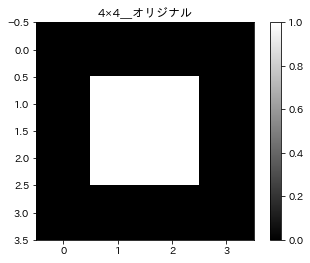

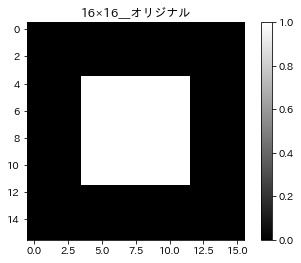

In [154]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import random

original = np.array([
                    [0,0,0,0],
                    [0,0,0,0],
                    [0,0,0,0],
                    [0,0,0,0]
],dtype = np.float64)
#print("I="+str(I))

plt.title("4×4＿オリジナル")
plt.imshow(original, cmap = 'gray', vmin = 0, vmax = 1, interpolation = 'none')
plt.colorbar()
#plt.savefig('4×4＿オリジナル.png')
plt.show()

size = original.shape
L = 16
pix = np.zeros((L, L))
i = L / size[0]

for n in range (0, size[0]):
    for m in range (0, size[0]):
        for a in range (0,int(i)):
            x = int(i) * n + a
            for b in range (0,int(i)):
                y = int(i) * m + b
               #print('n:', n, 'm:', m, 'a:', a, 'b:', b, ',x:', x, 'y:', y)
                pix[x][y] = original[n][m]

                
original=pix
plt.imshow(original, cmap = 'gray')
plt.title('16×16＿オリジナル')
plt.colorbar()
plt.show()   
                
                

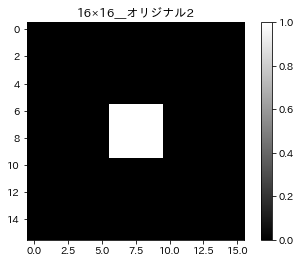

In [152]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import random
#4×4のイメージIの作成
original = np.array([
                    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0],
                    [0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0],
                    [0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0],
                    [0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],

],dtype = np.float64)
#print("I="+str(I))
plt.title('16×16＿オリジナル2')
plt.imshow(original, cmap = 'gray', interpolation = 'none')
plt.colorbar()
#plt.savefig('16×16オリジナル2.png')
plt.show()

In [155]:
x0=np.reshape(original,(256,1))
#print(x0)


pat=[]
M=150
for i in range(0,M):
    a=np.random.randint(0,5,(16,16))
    a=a/4
    pat.append(a)
    
    

S=pat*original
S_sum_yoko=np.sum(S, axis=2)
S_sum=np.sum(S_sum_yoko,axis=1)
#S_sum_av=np.average(S_sum)


A=np.reshape(pat,(M,256))#観測行列（パターン）

y=np.reshape(S_sum,(M,1))

N=256#16*16
#K=32
print(A.shape)


(150, 256)


In [167]:
#np.savetxt("AAAAAAA.csv",A)
print(A)

[[0.5  0.   0.25 ... 0.   1.   0.25]
 [0.   0.5  0.5  ... 0.75 0.5  0.75]
 [0.75 1.   1.   ... 1.   0.75 0.5 ]
 ...
 [0.25 1.   0.25 ... 0.25 0.25 1.  ]
 [0.25 0.   0.5  ... 0.25 0.25 0.75]
 [0.   0.75 1.   ... 0.25 0.   0.75]]


In [166]:
x=np.zeros((N,1))
z=np.zeros((N,1))
u=np.zeros((N,1))

mu=1



In [157]:
A1=np.dot(A.T,(np.linalg.inv(np.dot(A,A.T))))
A2=np.eye(N,N)-np.dot(A1,A)


In [158]:
def SoftThr(a,b):
    c=np.zeros(a.shape)
    d=np.where(a>b)
    c[d]=a[d]-b
    d=np.where(a<-b)
    c[d]=a[d]+b
    return c


In [159]:
for t in range(0,50):
    
    
    x=np.dot(A1,y)+np.dot(A2,(z-u))
    z=SoftThr(x+u,1/mu)
    u=u+x-z
    
    
    

In [161]:
print(x)

[[ 1.06939008e-04]
 [-7.41457374e-05]
 [-5.51415828e-04]
 [ 4.09303812e-04]
 [ 2.70593310e-04]
 [ 9.83694862e-05]
 [ 2.52024453e-04]
 [ 2.23291677e-04]
 [ 1.69427020e-04]
 [-2.92272319e-04]
 [ 9.15825801e-05]
 [-6.29210406e-04]
 [-2.80808707e-04]
 [ 4.65424336e-04]
 [-8.57943354e-04]
 [ 5.82505922e-04]
 [ 8.13569766e-05]
 [-4.56757528e-05]
 [-4.09817619e-05]
 [-3.28180995e-04]
 [ 4.77799642e-04]
 [-1.89806476e-04]
 [-5.48175302e-05]
 [-8.55434377e-04]
 [ 1.65298515e-04]
 [-1.55649015e-04]
 [ 1.08967168e-05]
 [ 1.84517322e-04]
 [-6.49740269e-04]
 [ 2.61788410e-06]
 [ 3.30878954e-05]
 [ 3.08430101e-04]
 [ 1.94232508e-04]
 [ 2.87751809e-04]
 [ 7.65332305e-06]
 [ 4.35720129e-04]
 [-6.88648563e-04]
 [-1.07775428e-04]
 [-1.18023617e-04]
 [-2.19974508e-04]
 [-8.35905678e-04]
 [-1.64330964e-04]
 [ 3.46842875e-04]
 [ 5.59547133e-05]
 [-2.32602201e-05]
 [-8.55902711e-04]
 [-1.63602066e-04]
 [-8.63273061e-05]
 [ 5.17471751e-04]
 [-1.59661686e-04]
 [ 5.83401826e-04]
 [ 2.07439081e-05]
 [-5.4083550

In [142]:
x=np.reshape(x,(16,16))

plt.imshow(x, cmap = 'gray')
plt.title('16×16_ADMM_スパース_%dパターン'%M)
plt.colorbar()
#plt.savefig('16×16_ISTAスパース＿%dパターン.png'%M)
plt.show()   

ValueError: cannot reshape array of size 1 into shape (16,16)

In [143]:
S_sum=[]
number=100
for k in range(0,number):
    pat=np.genfromtxt('C:/Users/student/Python_anaconda/imaging/20181210_オンオフさせたい/パターン保存用/パターン16×16（t=%d）.csv'%k,delimiter=",", skip_header=0, dtype='float')
    S=pat*original
    SS=S.sum()
    S_sum.append(SS)
    pat=np.reshape(pat,(1,256))
    A=np.concatenate((A,pat), axis = 0) 

#print(A)
#print(S_sum)

y=np.reshape(S_sum,(number))
#print(y)

In [144]:
x=np.zeros((N,1))
z=np.zeros((N,1))
u=np.zeros((N,1))

mu=1


In [145]:
print(A)

[[2.50000000e-01 5.00000000e-01 1.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 2.50000000e-01]
 [7.50000000e-01 2.50000000e-01 7.50000000e-01 ... 2.50000000e-01
  7.50000000e-01 0.00000000e+00]
 [2.50000000e-01 7.50000000e-01 2.50000000e-01 ... 1.00000000e+00
  7.50000000e-01 5.00000000e-01]
 ...
 [2.89509818e+03 8.31653808e+02 2.94514282e+03 ... 9.41867224e+03
  3.06787982e+03 1.20359536e+03]
 [4.96953217e+02 1.11280719e+03 7.04099092e+02 ... 1.00842548e+04
  1.10258441e+04 1.90624832e+03]
 [1.44529506e+03 2.48778873e+03 7.98032283e+02 ... 8.87274106e+03
  1.65971347e+04 7.06992840e+03]]


In [146]:
A1=np.dot(A.T,(np.linalg.inv(np.dot(A,A.T))))
A2=np.eye(N,N)-np.dot(A1,A)


In [147]:
def SoftThr(a,b):
    c=np.zeros(a.shape)
    d=np.where(a>b)
    c[d]=a[d]-b
    d=np.where(a<-b)
    c[d]=a[d]+b
    return c


In [148]:
for t in range(0,50):
    
    
    x=np.dot(A1,y)+np.dot(A2,(z-u))
    z=SoftThr(x+u,1/mu)
    u=u+x-z
    
    

ValueError: shapes (256,250) and (100,) not aligned: 250 (dim 1) != 100 (dim 0)

In [ ]:
x=np.reshape(x,(16,16))

plt.imshow(x, cmap = 'gray')
plt.title('16×16_ADMM_スパース_%dパターン'%number)
plt.colorbar()
#plt.savefig('16×16_ISTAスパース＿%dパターン.png'%M)
plt.show()   

In [249]:
S=pattern*I
S_sum_yoko=np.sum(S, axis=2)
S_sum=np.sum(S_sum_yoko,axis=1)
#S_sum_av=np.average(S_sum)

In [208]:
import sys

print("{}{: >25}{}{: >10}{}".format('|','Variable Name','|','Memory','|'))
print(" ------------------------------------ ")
for var_name in dir():
    if not var_name.startswith("_"):
        print("{}{: >25}{}{: >10}{}".format('|',var_name,'|',sys.getsizeof(eval(var_name)),'|'))


|            Variable Name|    Memory|
 ------------------------------------ 
|                        A|        56|
|                       A1|   2048056|
|                       A2|    524344|
|                    Image|        44|
|                       In|       968|
|                        K|        14|
|                        L|        14|
|                        M|        14|
|                        N|        14|
|                      Out|       148|
|                        S|  10240064|
|                    S_sum|     40048|
|                 S_sum_av|        24|
|               S_sum_yoko|    640056|
|                  SoftThr|        72|
|                        a|      2104|
|                        b|        14|
|                     exit|        32|
|              get_ipython|        36|
|                        i|        14|
|                        m|        14|
|                       mu|        16|
|                        n|        14|
|                       n

In [209]:
del A1
del A2
del S